In [141]:
import pandas as pd
import numpy as np
f=(10,6)

In [2]:
from sklearn.linear_model import LinearRegression
np.random.seed(100)

In [3]:
reg=LinearRegression()
x=np.linspace(0,10)
y=x+np.random.standard_normal(len(x))
x=x.reshape(-1,1)
# y

In [4]:
reg=reg.fit(x,y)

In [5]:
from pylab import mpl,plt

In [6]:
plt.style.use('seaborn')

In [7]:
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

In [8]:
reg.coef_,reg.intercept_

(array([0.94612934]), 0.22855260736735605)

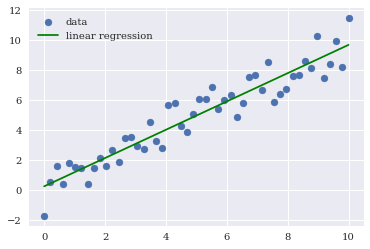

In [9]:
plt.scatter(x,y,label="data")
plt.plot(x,reg.predict(x),'g',label="linear regression")
plt.legend(loc="best")

In [10]:
lags=3
x=np.arange(12)

In [11]:
m=np.zeros((lags+1,len(x)-lags))

In [12]:
m[lags]=x[lags:]

In [13]:
for i in range(lags):
    m[i]=x[i:i-lags]

In [14]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [15]:
reg=np.linalg.lstsq(m[:lags].T,m[lags],rcond=None)[0]

In [16]:
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [17]:
np.dot(m[:lags].T,reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [18]:
raw=pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [20]:
data=pd.DataFrame(raw['EUR='])

In [21]:
data.rename(columns={"EUR=":'price'},inplace=True)

In [22]:
data

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [23]:
lags=5
cols=[]
for lag in range(1,lags+1):
    col=f'lag_{lag}'
    data[col]=data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [24]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120


In [25]:
from sklearn.ensemble import RandomForestRegressor


<AxesSubplot:xlabel='Date'>

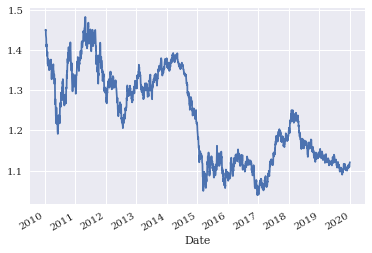

In [26]:
data.price.plot()

In [27]:
reg=np.linalg.lstsq(data[cols],data['price'],rcond=None)[0]

In [28]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [29]:
data['prediction']=np.dot(data[cols],reg)

<AxesSubplot:xlabel='Date'>

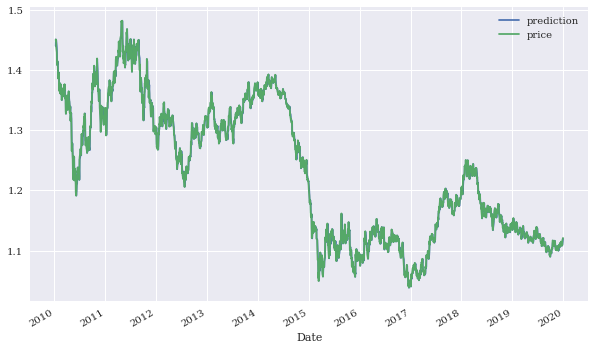

In [30]:
data[['prediction','price']].plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

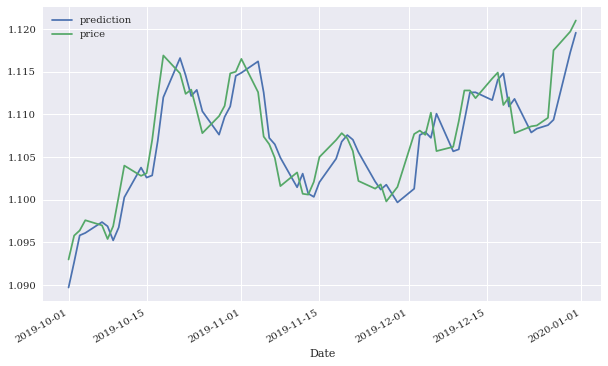

In [31]:
data[['prediction','price']].loc['2019-10-1':].plot(figsize=(10,6))

In [32]:
reg=RandomForestRegressor(n_estimators=100)




In [33]:
reg.fit(data.loc[:'2017-1-1',cols],data.price[:'2017-1-1'])

RandomForestRegressor()

Text(0.5, 1.0, 'the score is 0.9549999476206505')

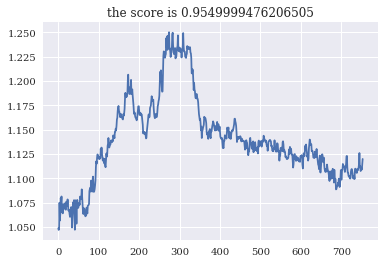

In [34]:
vals=reg.predict(data.loc['2017-1-1':,cols])



plt.plot(vals)
score=reg.score(data.loc['2017-1-1':,cols],data.price['2017-1-1':])
plt.title(f"the score is {score}")

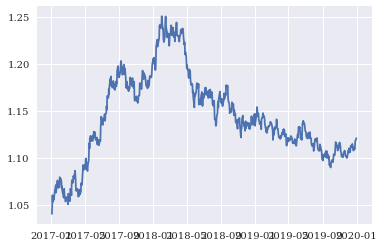

In [35]:
plt.plot(data.price['2017-1-1':])

In [36]:
data['return']=np.log(data['price']/data['price'].shift(1))

In [37]:
data.dropna(inplace=True)
col_returns=[]

In [38]:
for lag in range(1,lags+1):
    col=f"lag_return_{lag}"
    data[col]=data['return'].shift(lag)
    col_returns.append(col)
data.dropna(inplace=True)

In [39]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,lag_return_1,lag_return_2,lag_return_3,lag_return_4,lag_return_5
Date,,,,,,,,,,,,,
2010-01-20,1.4101,1.4298,1.4382,1.4502,1.4510,1.4494,1.429671,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,-0.001310
2010-01-21,1.4090,1.4101,1.4298,1.4382,1.4502,1.4510,1.410560,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,0.001103
2010-01-22,1.4137,1.4090,1.4101,1.4298,1.4382,1.4502,1.408829,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551
2010-01-25,1.4150,1.4137,1.4090,1.4101,1.4298,1.4382,1.414101,0.000919,0.003330,-0.000780,-0.013874,-0.005858,-0.008309
2010-01-26,1.4073,1.4150,1.4137,1.4090,1.4101,1.4298,1.414653,-0.005457,0.000919,0.003330,-0.000780,-0.013874,-0.005858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149,1.108330,0.000090,0.000722,-0.003784,0.000810,-0.003414,0.000628
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111,1.108738,0.000811,0.000090,0.000722,-0.003784,0.000810,-0.003414
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120,1.109368,0.007094,0.000811,0.000090,0.000722,-0.003784,0.000810


In [40]:
reg2=np.linalg.lstsq(data[col_returns],data['return'],rcond=None)[0]

In [41]:
reg2

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [42]:
data['prediction2']=np.dot(data[col_returns],reg2)

<AxesSubplot:title={'center':'predicted log returns'}, xlabel='Date'>

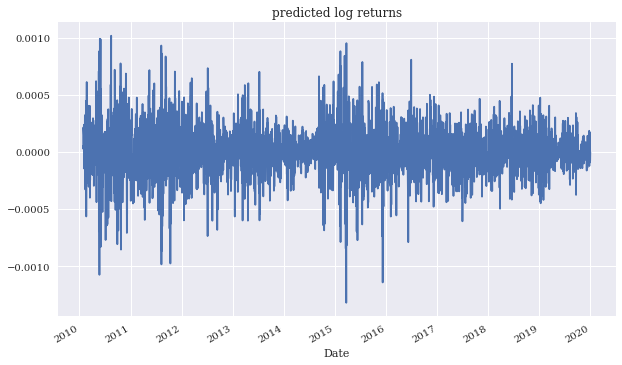

In [43]:
data['prediction2'].iloc[lags:].plot(figsize=(10,6),title="predicted log returns")

<AxesSubplot:title={'center':'actual log returns'}, xlabel='Date'>

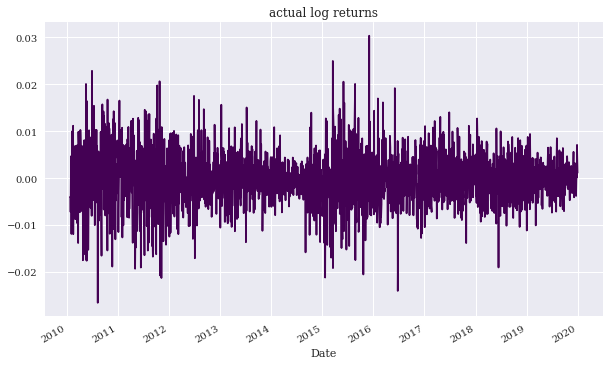

In [44]:
from matplotlib import pyplot
data['return'].iloc[lags:].plot(figsize=(10,6),cmap=pyplot.cm.viridis,title="actual log returns")

In [45]:
hits=np.sign(data['return']*data['prediction2']).value_counts()

In [46]:
hits

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [47]:
hits.values[0]/sum(hits)
#hit ratio.

0.499001996007984

In [48]:
reg=np.linalg.lstsq(data[col_returns],np.sign(data['return']),rcond=None)[0]

In [49]:
reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [50]:
data['prediction3']=np.sign(np.dot(data[col_returns],reg))

In [51]:
data['prediction3']

Date
2010-01-20    1.0
2010-01-21    1.0
2010-01-22    1.0
2010-01-25    1.0
2010-01-26    1.0
             ... 
2019-12-24    1.0
2019-12-26    1.0
2019-12-27    1.0
2019-12-30   -1.0
2019-12-31   -1.0
Name: prediction3, Length: 2505, dtype: float64

In [52]:
data['prediction3'].value_countsunts()

 1.0    1300
-1.0    1205
Name: prediction3, dtype: int64

In [53]:
hits=np.sign(data['return']*data['prediction']).value_counts()

In [54]:
hits

 1.0    1254
-1.0    1238
 0.0      13
dtype: int64

In [56]:
hits.values[0]/sum(hits)

0.5005988023952096

In [70]:
data=data[['price','lag_1','lag_2','lag_3','lag_4','lag_5','prediction3','return']]

In [71]:
data['strategy']=data['prediction3']*data['return']

In [72]:
data[['return','strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

<AxesSubplot:xlabel='Date'>

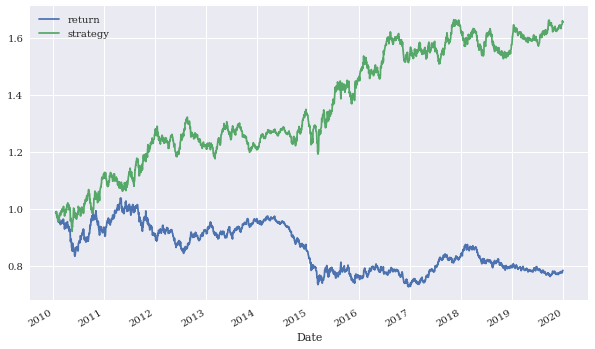

In [73]:
data[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [74]:
import LRVectorBacktester as LR

In [75]:
lrbt=LR.LRVectorBacktester('EUR=','2010-1-1','2019-12-31',10000,0)

In [76]:
lrbt.run_strategy('2010-1-1','2019-12-31','2010-1-1',"2019-12-31",lags=5)

(17166.53, 9442.42)

In [77]:
lrbt.run_strategy('2010-1-1','2017-12-31','2018-1-1',"2019-12-31",lags=5)

(10160.86, 791.87)

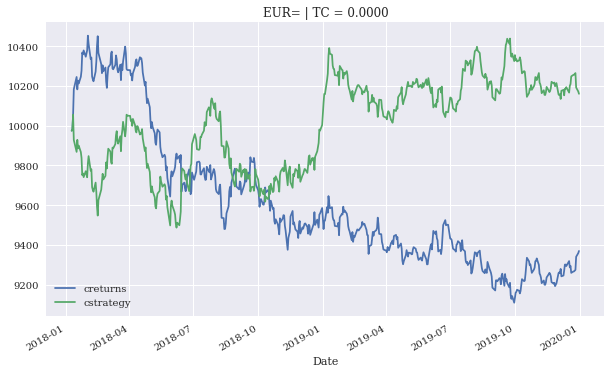

In [78]:
lrbt.plot_results()

In [79]:
lrbt=LR.LRVectorBacktester('GDX','2010-1-1','2019-12-31',10000,0.002)

In [81]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
 '2010-1-1', '2019-12-31', lags=7)

(23642.32, 17649.69)

In [82]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
 '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

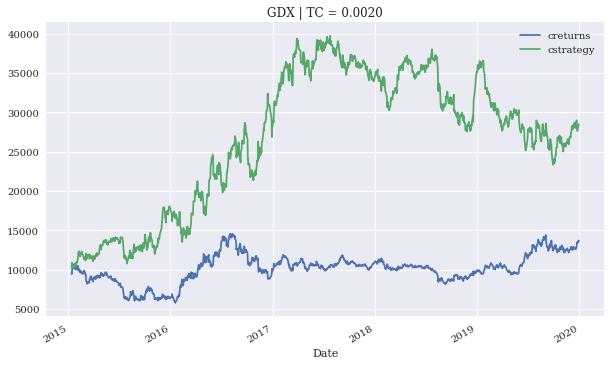

In [83]:
lrbt.plot_results()

In [84]:
d=pd.DataFrame(raw['GLD'])

In [87]:
d.rename(columns={'GLD':'price'},inplace=True)

In [89]:

d.head()

,price
Date,
2010-01-04,109.80
2010-01-05,109.70
2010-01-06,111.51
2010-01-07,110.82
2010-01-08,111.37


In [90]:
d['returns']=np.log(d.price/d.price.shift(1))

In [93]:
d.dropna(inplace=True)
d.head()

,price,returns
Date,,
2010-01-05,109.70,-0.000911
2010-01-06,111.51,0.016365
2010-01-07,110.82,-0.006207
2010-01-08,111.37,0.004951
2010-01-11,112.85,0.013202


In [95]:
lags=3
cols=[]
for lag in range(1,lags+1):
    s=f"lagReturn_{lag}"
    cols.append(s)
    d[s]=d.returns.shift(lag)

In [96]:
d.head()

,price,returns,lagReturn_1,lagReturn_2,lagReturn_3
Date,,,,,
2010-01-05,109.70,-0.000911,NaN,NaN,NaN
2010-01-06,111.51,0.016365,-0.000911,NaN,NaN
2010-01-07,110.82,-0.006207,0.016365,-0.000911,NaN
2010-01-08,111.37,0.004951,-0.006207,0.016365,-0.000911
2010-01-11,112.85,0.013202,0.004951,-0.006207,0.016365


In [104]:
d.dropna(inplace=True)

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(C=1e7,solver='lbfgs',multi_class='auto',max_iter=1000)

In [106]:
lm.fit(d[cols],np.sign(d['returns']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [118]:
d['prediction']=lm.predict(d[cols])
d.head()

,price,returns,lagReturn_1,lagReturn_2,lagReturn_3,prediction,strategy
Date,,,,,,,
2010-01-08,111.37,0.004951,-0.006207,0.016365,-0.000911,1.0,0.004951
2010-01-11,112.85,0.013202,0.004951,-0.006207,0.016365,1.0,0.013202
2010-01-12,110.49,-0.021134,0.013202,0.004951,-0.006207,-1.0,0.021134
2010-01-13,111.54,0.009458,-0.021134,0.013202,0.004951,1.0,0.009458
2010-01-14,112.03,0.004383,0.009458,-0.021134,0.013202,-1.0,-0.004383


In [109]:
d.prediction.value_counts()

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [111]:
hits=np.sign(d['returns'].iloc[lags:]*d['prediction'].iloc[lags:]).value_counts()

In [112]:
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [113]:
accuracy_score(d['prediction'],np.sign(d['returns']))

0.5338375796178344

In [114]:
d['strategy']=d['prediction']*d['returns']

In [116]:
d[['strategy','returns']].sum().apply(np.exp)

strategy    2.458716
returns     1.289478
dtype: float64

<AxesSubplot:xlabel='Date'>

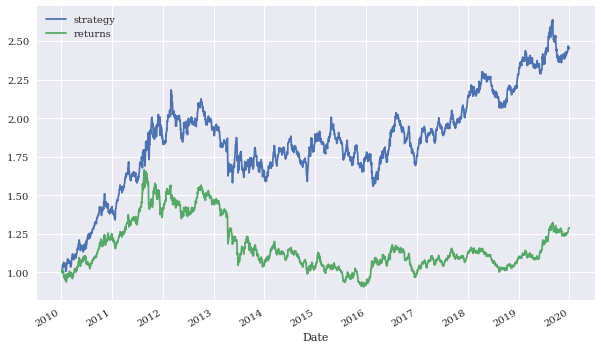

In [117]:
d[['strategy','returns']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [120]:
lags=5
d=pd.DataFrame(raw['GLD'])
d.rename(columns={'GLD':'price'},inplace=True)

In [121]:
d['returns']=np.log(d.price/d.price.shift(1))

In [122]:
c=[]
for lag in range(1,lags+1):
    s=f"lagReturns_{lag}"
    d[s]=d.returns.shift(lag)
    c.append(s)

In [123]:
d.head()

,price,returns,lagReturns_1,lagReturns_2,lagReturns_3,lagReturns_4,lagReturns_5
Date,,,,,,,
2010-01-04,109.80,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,109.70,-0.000911,NaN,NaN,NaN,NaN,NaN
2010-01-06,111.51,0.016365,-0.000911,NaN,NaN,NaN,NaN
2010-01-07,110.82,-0.006207,0.016365,-0.000911,NaN,NaN,NaN
2010-01-08,111.37,0.004951,-0.006207,0.016365,-0.000911,NaN,NaN


In [124]:
d.dropna(inplace=True)

In [126]:
l=LogisticRegression(C=1e7,max_iter=1000,solver='lbfgs',multi_class='auto')

In [127]:
lm

LogisticRegression(C=10000000.0, max_iter=1000)

In [128]:
lm.fit(d[c],np.sign(d['returns']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [129]:
d['prediction']=lm.predict(d[c])

In [131]:
d.prediction.value_counts()

 1.0    1975
-1.0     535
Name: prediction, dtype: int64

In [132]:
hits=np.sign(d.returns.iloc[lags:]*d.prediction.iloc[lags:]).value_counts()

In [133]:
hits

 1.0    1334
-1.0    1159
 0.0      12
dtype: int64

In [134]:
accuracy_score(d.prediction,np.sign(d.returns))

0.5326693227091633

In [135]:
d['strategy']=d.prediction*d.returns

In [137]:
d[['returns','strategy']].sum().apply(np.exp)

returns     1.266283
strategy    2.727676
dtype: float64

<AxesSubplot:xlabel='Date'>

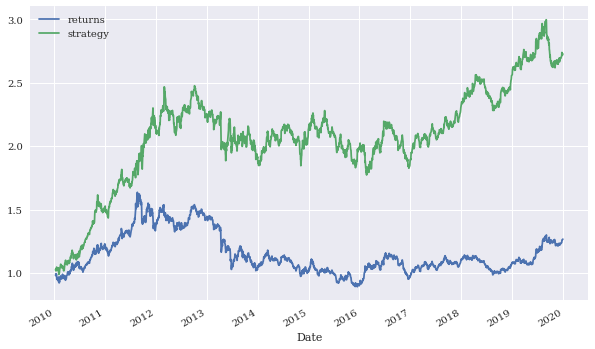

In [142]:
d[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=f)

In [143]:
import ScikitVectorBacktester as SCI

In [144]:
scibt=SCI.ScikitVectorBacktester('EUR=',
 '2010-1-1', '2019-12-31',
 10000, 0.0, 'logistic')

In [145]:
scibt.run_strategy('2015-1-1', '2019-12-31',
 '2015-1-1', '2019-12-31', lags=15)

(12192.18, 2189.5)

In [146]:
scibt.run_strategy('2016-1-1', '2018-12-31',
 '2019-1-1', '2019-12-31', lags=15)


(10580.54, 729.93)

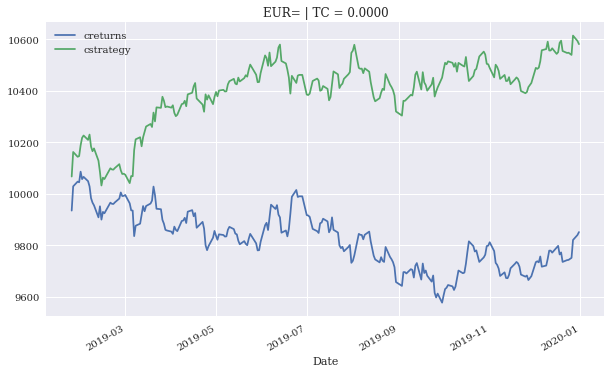

In [147]:
scibt.plot_results()

In [148]:
scibt2=SCI.ScikitVectorBacktester('GDX','2010-1-1','2019-12-31',10000,0,'logistic')

In [149]:
scibt2.run_strategy('2013-1-1','2017-12-31','2018-1-1','2018-12-31',lags=10)

(12686.81, 4032.73)

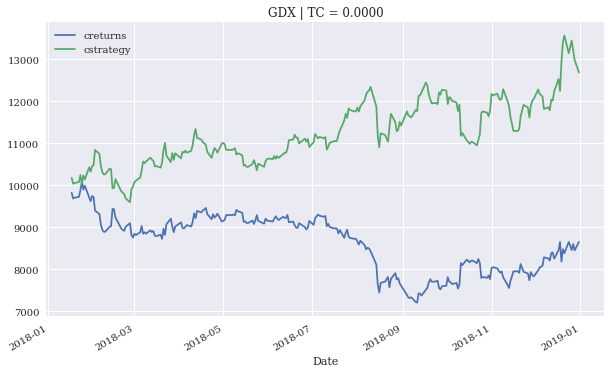

In [150]:
scibt2.plot_results()

In [151]:
scibt2=SCI.ScikitVectorBacktester('GDX',
 '2010-1-1', '2019-12-31',
 10000, 0.0025, 'logistic')

In [152]:
scibt2.run_strategy('2013-1-1', '2017-12-31',
 '2018-1-1', '2018-12-31', lags=10)

(9588.48, 934.4)

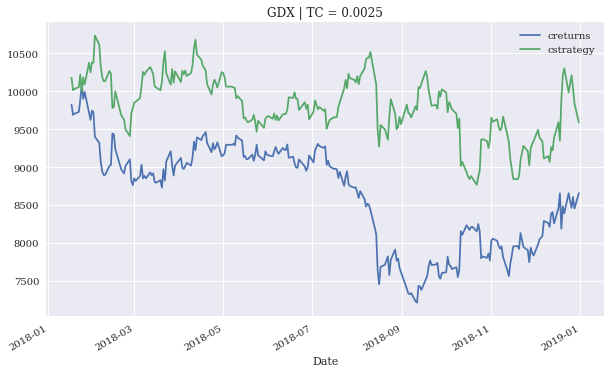

In [153]:
scibt2.plot_results()